# 1083 Albumin Initial ML

### By: Ian Weimer

In [182]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)

Imbalanced-Learn 0.7.0


## Imports

In [421]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
import pydotplus
from imblearn.over_sampling import SMOTE, SMOTENC
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [422]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/Blood_Diseases_Tables/blood_diseases_matched_600k.csv')

In [423]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [424]:
df.head()

encounterid  ICU  CCI  bl_albumin_value  \
0  ec2225c5-1282-4bac-a058-cd4bb622cf44    0    0               3.8   
1  d30515eb-ffba-47ca-8461-75b87e869897    0    6               2.7   
2  759f2370-8844-4f95-803e-1705cd64e48a    0    3               2.9   
3  65efb5c0-bce6-4521-b9c3-c479f57144e3    0    4               2.6   
4  59da07b9-0646-48fe-a49a-b0ffb59c85fd    1    3               3.8   

   albumin_lab_baseline_severity  qSOFA  beta_blocker  Cirrhosis_score  \
0                            0.0      0             1                0   
1                            1.0      1             1                0   
2                            1.0      1             1                0   
3                            1.0      1             1                1   
4                            0.0      2             1                0   

   nutritional_anemia  SEWS  propensity_score  propensity_logit  \
0                   0     2          0.405546         -0.382410   
1                   1     2          0.546378          0.186047   
2                   0     1          0.777894          1.253437   
3                   1     1          0.823276          1.538700   
4                   0     2          0.935854          2.680297   

   albumin_24_hours                              personid condition  albumin  \
0                 1  e03e3d84-4ad6-47c8-8491-1e22f97f477d       D63        1   
1                 1  af83e203-8d82-4574-a8a9-b9784d0f5ad1       D62        1   
2                 1  2bb28ca4-85e1-4aff-9f3e-5c3d15b8ee14       D72        1   
3                 1  44dba10f-e509-4209-854d-57b699bc45d8       D50        1   
4                 1  f3c5fdb4-db04-475c-9e67-94bd464539a1       D62        1   

    LOS_hours  hospital_free_days  
0  146.750000                12.0  
1  375.266667                16.0  
2   63.950000                55.0  
3   72.600000                23.0  
4  246.683333                 5.0

In [425]:
df[df['albumin_24_hours'] == 1].LOS_hours.describe()

count    88973.000000
mean       213.942267
std        221.554160
min          0.000000
25%         79.800000
50%        146.900000
75%        263.166667
max       1973.815000
Name: LOS_hours, dtype: float64

In [426]:
df[df['albumin_24_hours'] == 0].LOS_hours.describe()

count    88943.000000
mean       191.559817
std        228.354483
min          0.000000
25%         57.883333
50%        119.533333
75%        237.466667
max       1974.150000
Name: LOS_hours, dtype: float64

In [427]:
df[df['albumin_24_hours'] == 1].bl_albumin_value.describe()

count    88973.000000
mean         2.868753
std          0.828801
min          0.002100
25%          2.300000
50%          2.900000
75%          3.500000
max          7.300000
Name: bl_albumin_value, dtype: float64

In [428]:
df[df['albumin_24_hours'] == 0].bl_albumin_value.describe()

count    88943.000000
mean         2.940618
std          0.799506
min          0.001000
25%          2.400000
50%          3.000000
75%          3.500000
max          6.000000
Name: bl_albumin_value, dtype: float64

In [429]:
df[df['albumin_24_hours'] == 1].hospital_free_days.describe()

count    88973.000000
mean        37.748901
std         34.763147
min          0.000000
25%          2.000000
50%         27.000000
75%         77.000000
max         90.000000
Name: hospital_free_days, dtype: float64

In [430]:
df[df['albumin_24_hours'] == 0].hospital_free_days.describe()

count    88943.000000
mean        40.536141
std         34.502262
min          0.000000
25%          5.000000
50%         33.000000
75%         79.000000
max         90.000000
Name: hospital_free_days, dtype: float64

In [431]:
df.drop(columns=['encounterid', 'personid', 'condition', 'albumin', 'propensity_score', 'propensity_logit', 'hospital_free_days'], inplace=True)

In [432]:
# df.drop(columns=['ICU', 'qSOFA', 'beta_blocker', 'bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [433]:
df.shape

(177916, 11)

In [434]:
df.describe()

ICU            CCI  bl_albumin_value  \
count  177916.000000  177916.000000     177916.000000   
mean        0.230508       3.853925          2.904679   
std         0.421159       2.839336          0.815078   
min         0.000000       0.000000          0.001000   
25%         0.000000       2.000000          2.300000   
50%         0.000000       3.000000          2.900000   
75%         0.000000       5.000000          3.500000   
max         1.000000      20.000000          7.300000   

       albumin_lab_baseline_severity          qSOFA   beta_blocker  \
count                  177916.000000  177916.000000  177916.000000   
mean                        0.518762       0.705119       0.388335   
std                         0.499649       0.758444       0.487373   
min                         0.000000       0.000000       0.000000   
25%                         0.000000       0.000000       0.000000   
50%                         1.000000       1.000000       0.000000   
75%                         1.000000       1.000000       1.000000   
max                         1.000000       3.000000       1.000000   

       Cirrhosis_score  nutritional_anemia           SEWS  albumin_24_hours  \
count    177916.000000       177916.000000  177916.000000     177916.000000   
mean          0.335906            0.088716       1.560720          0.500084   
std           0.472307            0.284334       1.806783          0.500001   
min           0.000000            0.000000       0.000000          0.000000   
25%           0.000000            0.000000       0.000000          0.000000   
50%           0.000000            0.000000       1.000000          1.000000   
75%           1.000000            0.000000       2.000000          1.000000   
max           1.000000            1.000000      16.000000          1.000000   

           LOS_hours  
count  177916.000000  
mean      202.752929  
std       225.256986  
min         0.000000  
25%        69.383333  
50%       133.508333  
75%       248.700000  
max      1974.150000

In [435]:
#df = df[['CCI', 'unknown_albumin_type', 'albumin_24hrs', '25_percent_albumin', 'LOS_days']]

In [436]:
df['LOS_days'] = df['LOS_hours']/24
df.drop(columns=['LOS_hours'], inplace=True)

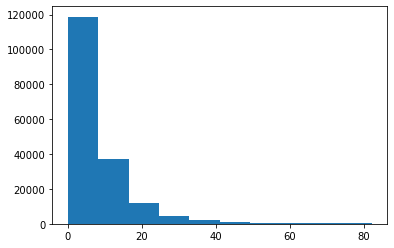

In [437]:
plt.hist(df['LOS_days']);

In [438]:
df['LOS_days'].describe()

count    177916.000000
mean          8.448039
std           9.385708
min           0.000000
25%           2.890972
50%           5.562847
75%          10.362500
max          82.256250
Name: LOS_days, dtype: float64

In [439]:
# Calculate Tertiles

q1 = df['LOS_days'].quantile(q=(1/3))
q2 = df['LOS_days'].quantile(q=(2/3))
print(q1)
print(q2)

3.733333333333333
8.212627314814814


In [440]:
# bin the LOS_days var

LOS = df['LOS_days']
m = max(LOS)

bins = [0, 3.73, 8.21, m]
labels=[0, 1, 2]

# 0 - Low/Short Length of Stay
# 1 - Medium Length of Stay
# 2 - High/Long Length of Stay

df['LOS_days'] = pd.cut(LOS, bins=bins, labels=labels, include_lowest=True)

In [441]:
df['LOS_days'].value_counts()

2    59342
1    59315
0    59259
Name: LOS_days, dtype: int64

## Modeling

In [442]:
# establish target feature, LOS_days, as y feature
y = df['LOS_days']
# drop target feature from features dataframe
X = df.drop(columns = ['LOS_days'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [443]:
cols

Index(['ICU', 'CCI', 'bl_albumin_value', 'albumin_lab_baseline_severity',
       'qSOFA', 'beta_blocker', 'Cirrhosis_score', 'nutritional_anemia',
       'SEWS', 'albumin_24_hours'],
      dtype='object')

## Standardize Data

In [444]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [445]:
X.head()

ICU  CCI  bl_albumin_value  albumin_lab_baseline_severity  qSOFA  \
0    0    0               3.8                            0.0      0   
1    0    6               2.7                            1.0      1   
2    0    3               2.9                            1.0      1   
3    0    4               2.6                            1.0      1   
4    1    3               3.8                            0.0      2   

   beta_blocker  Cirrhosis_score  nutritional_anemia  SEWS  albumin_24_hours  
0             1                0                   0     2                 1  
1             1                0                   1     2                 1  
2             1                0                   0     1                 1  
3             1                1                   1     1                 1  
4             1                0                   0     2                 1

In [446]:
X.shape

(177916, 10)

## Train Test Split

In [311]:
#sm = SMOTENC(random_state=42, categorical_features = [0, 1, 2, 3, 4, 5, \
#                                                     6, 7, 8, 9, 10])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [312]:
#sm = SMOTEN(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [447]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

In [448]:
y_train.value_counts()

1    47628
2    47397
0    47307
Name: LOS_days, dtype: int64

## Multinomial Logistic Regression

In [315]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Feature: ICU Score: -0.50712
Feature: CCI Score: -0.02273
Feature: bl_albumin_value Score: 0.09677
Feature: albumin_lab_baseline_severity Score: -0.15139
Feature: qSOFA Score: -0.11210
Feature: beta_blocker Score: -0.40167
Feature: Cirrhosis_score Score: 0.19099
Feature: nutritional_anemia Score: 0.08353
Feature: SEWS Score: -0.02114
Feature: albumin_24_hours Score: -0.33687


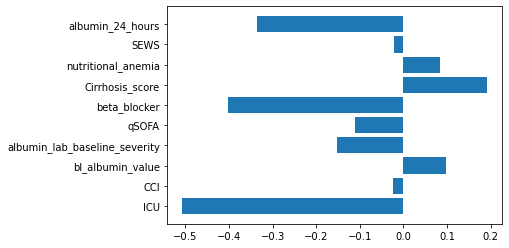

In [316]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

                               Importance
Cirrhosis_score                  1.210445
bl_albumin_value                 1.101602
nutritional_anemia               1.087119
SEWS                             0.979083
CCI                              0.977530
qSOFA                            0.893951
albumin_lab_baseline_severity    0.859515
albumin_24_hours                 0.714002
beta_blocker                     0.669205
ICU                              0.602228


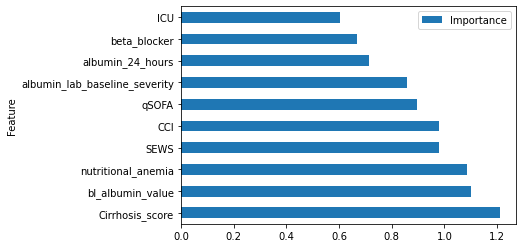

In [317]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [318]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [319]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[26765  8439 12103]
 [19111 11491 17026]
 [13362  9258 24777]]


In [320]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.45      0.57      0.50     47307
           1       0.39      0.24      0.30     47628
           2       0.46      0.52      0.49     47397

    accuracy                           0.44    142332
   macro avg       0.44      0.44      0.43    142332
weighted avg       0.43      0.44      0.43    142332



In [321]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[6827 2135 2990]
 [4669 2906 4112]
 [3401 2348 6196]]


In [322]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.46      0.57      0.51     11952
           1       0.39      0.25      0.30     11687
           2       0.47      0.52      0.49     11945

    accuracy                           0.45     35584
   macro avg       0.44      0.45      0.43     35584
weighted avg       0.44      0.45      0.44     35584



## 1: Decision Tree (Max Depth=3)

In [449]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=3)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Feature: ICU Score: 0.37667
Feature: CCI Score: 0.00000
Feature: bl_albumin_value Score: 0.25786
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.10914
Feature: beta_blocker Score: 0.05064
Feature: Cirrhosis_score Score: 0.00000
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.00000
Feature: albumin_24_hours Score: 0.20569


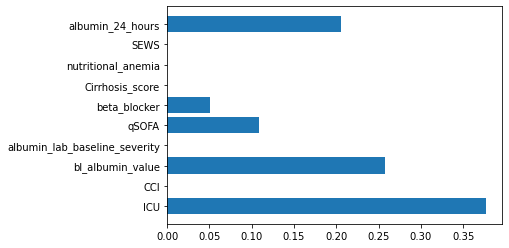

In [450]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [451]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [452]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[24023 10546 12738]
 [16705 12993 17930]
 [14346  9187 23864]]


In [453]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.44      0.51      0.47     47307
           1       0.40      0.27      0.32     47628
           2       0.44      0.50      0.47     47397

    accuracy                           0.43    142332
   macro avg       0.42      0.43      0.42    142332
weighted avg       0.42      0.43      0.42    142332



In [454]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[6029 2725 3198]
 [4136 3253 4298]
 [3569 2246 6130]]


In [455]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.44      0.50      0.47     11952
           1       0.40      0.28      0.33     11687
           2       0.45      0.51      0.48     11945

    accuracy                           0.43     35584
   macro avg       0.43      0.43      0.43     35584
weighted avg       0.43      0.43      0.43     35584



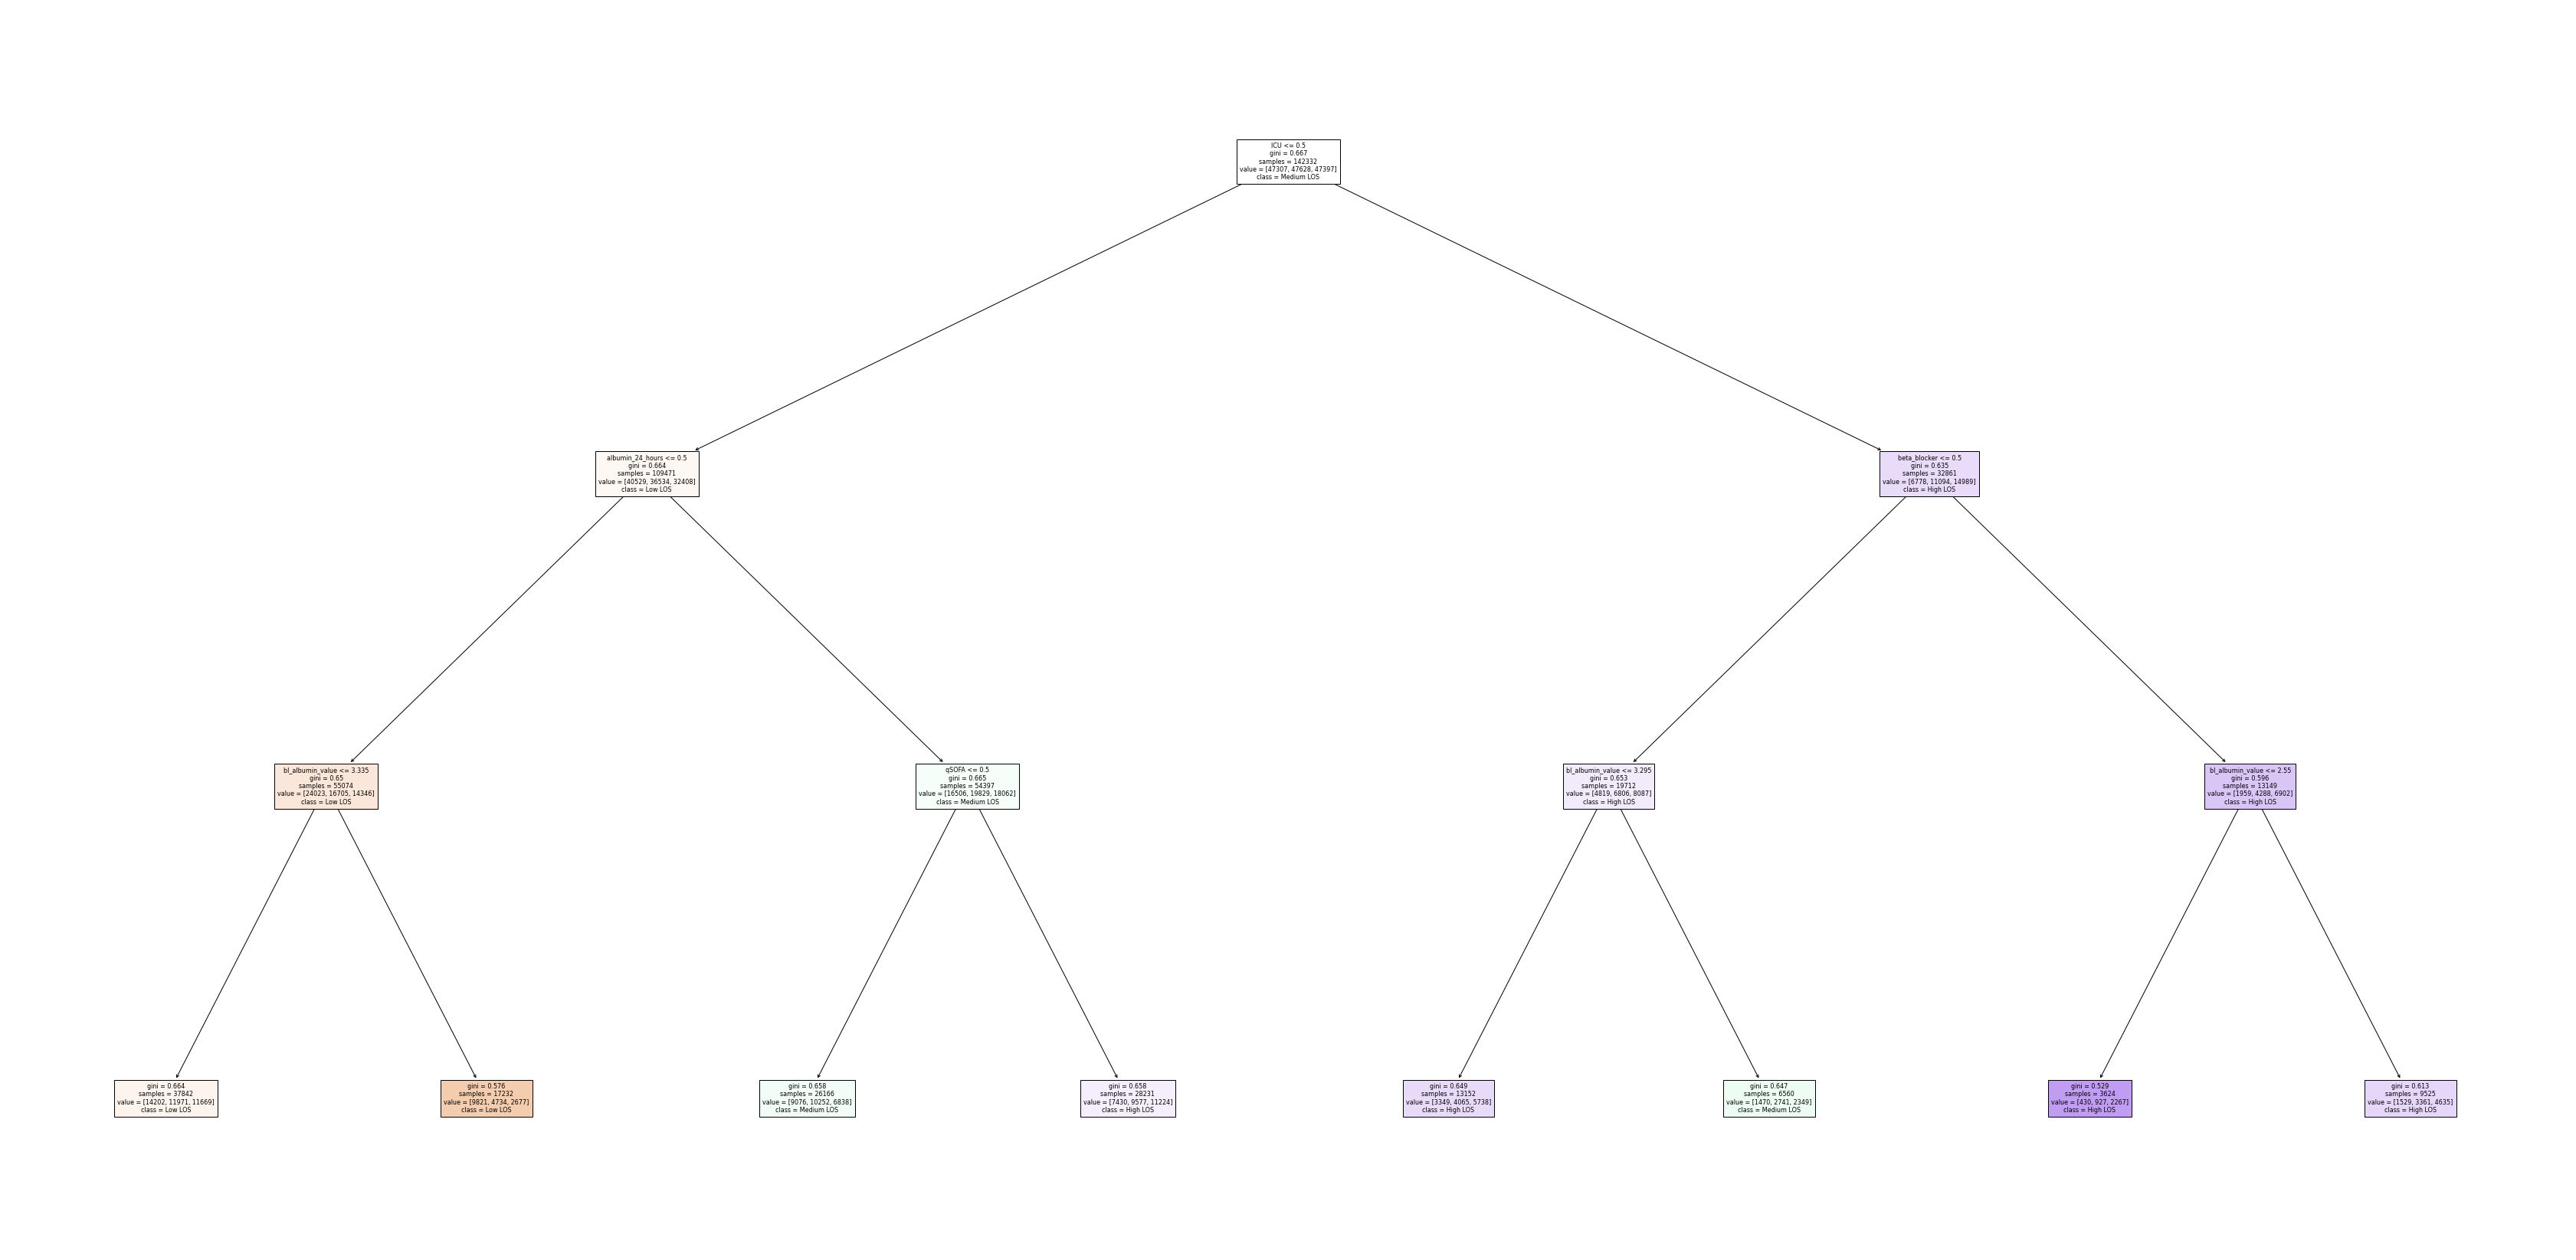

In [456]:
feature_names = X_train.columns.tolist()
class_names = ['Low LOS', 'Medium LOS', 'High LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [347]:
pwd

'C:\\Users\\Iweimer\\Desktop\\BB_Git\\1083-albumin-data-exploration\\ML\\Blood_Diseases_Cohort'

In [348]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D3_MATCHED_178K.png')

True

## 2: Decision Tree (Max Depth=4)

In [457]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=4)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Feature: ICU Score: 0.30220
Feature: CCI Score: 0.00000
Feature: bl_albumin_value Score: 0.22500
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.08757
Feature: beta_blocker Score: 0.20241
Feature: Cirrhosis_score Score: 0.00000
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.00719
Feature: albumin_24_hours Score: 0.17562


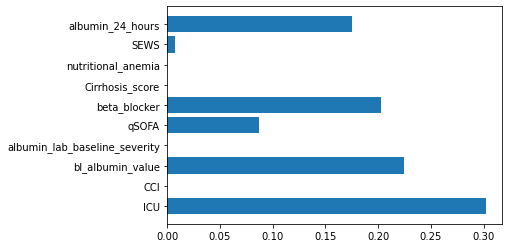

In [458]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [459]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [460]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[19708 10546 17053]
 [11384 12993 23251]
 [ 8660  9187 29550]]


In [461]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.50      0.42      0.45     47307
           1       0.40      0.27      0.32     47628
           2       0.42      0.62      0.50     47397

    accuracy                           0.44    142332
   macro avg       0.44      0.44      0.43    142332
weighted avg       0.44      0.44      0.43    142332



In [462]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4929 2725 4298]
 [2783 3253 5651]
 [2156 2246 7543]]


In [463]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.50      0.41      0.45     11952
           1       0.40      0.28      0.33     11687
           2       0.43      0.63      0.51     11945

    accuracy                           0.44     35584
   macro avg       0.44      0.44      0.43     35584
weighted avg       0.44      0.44      0.43     35584



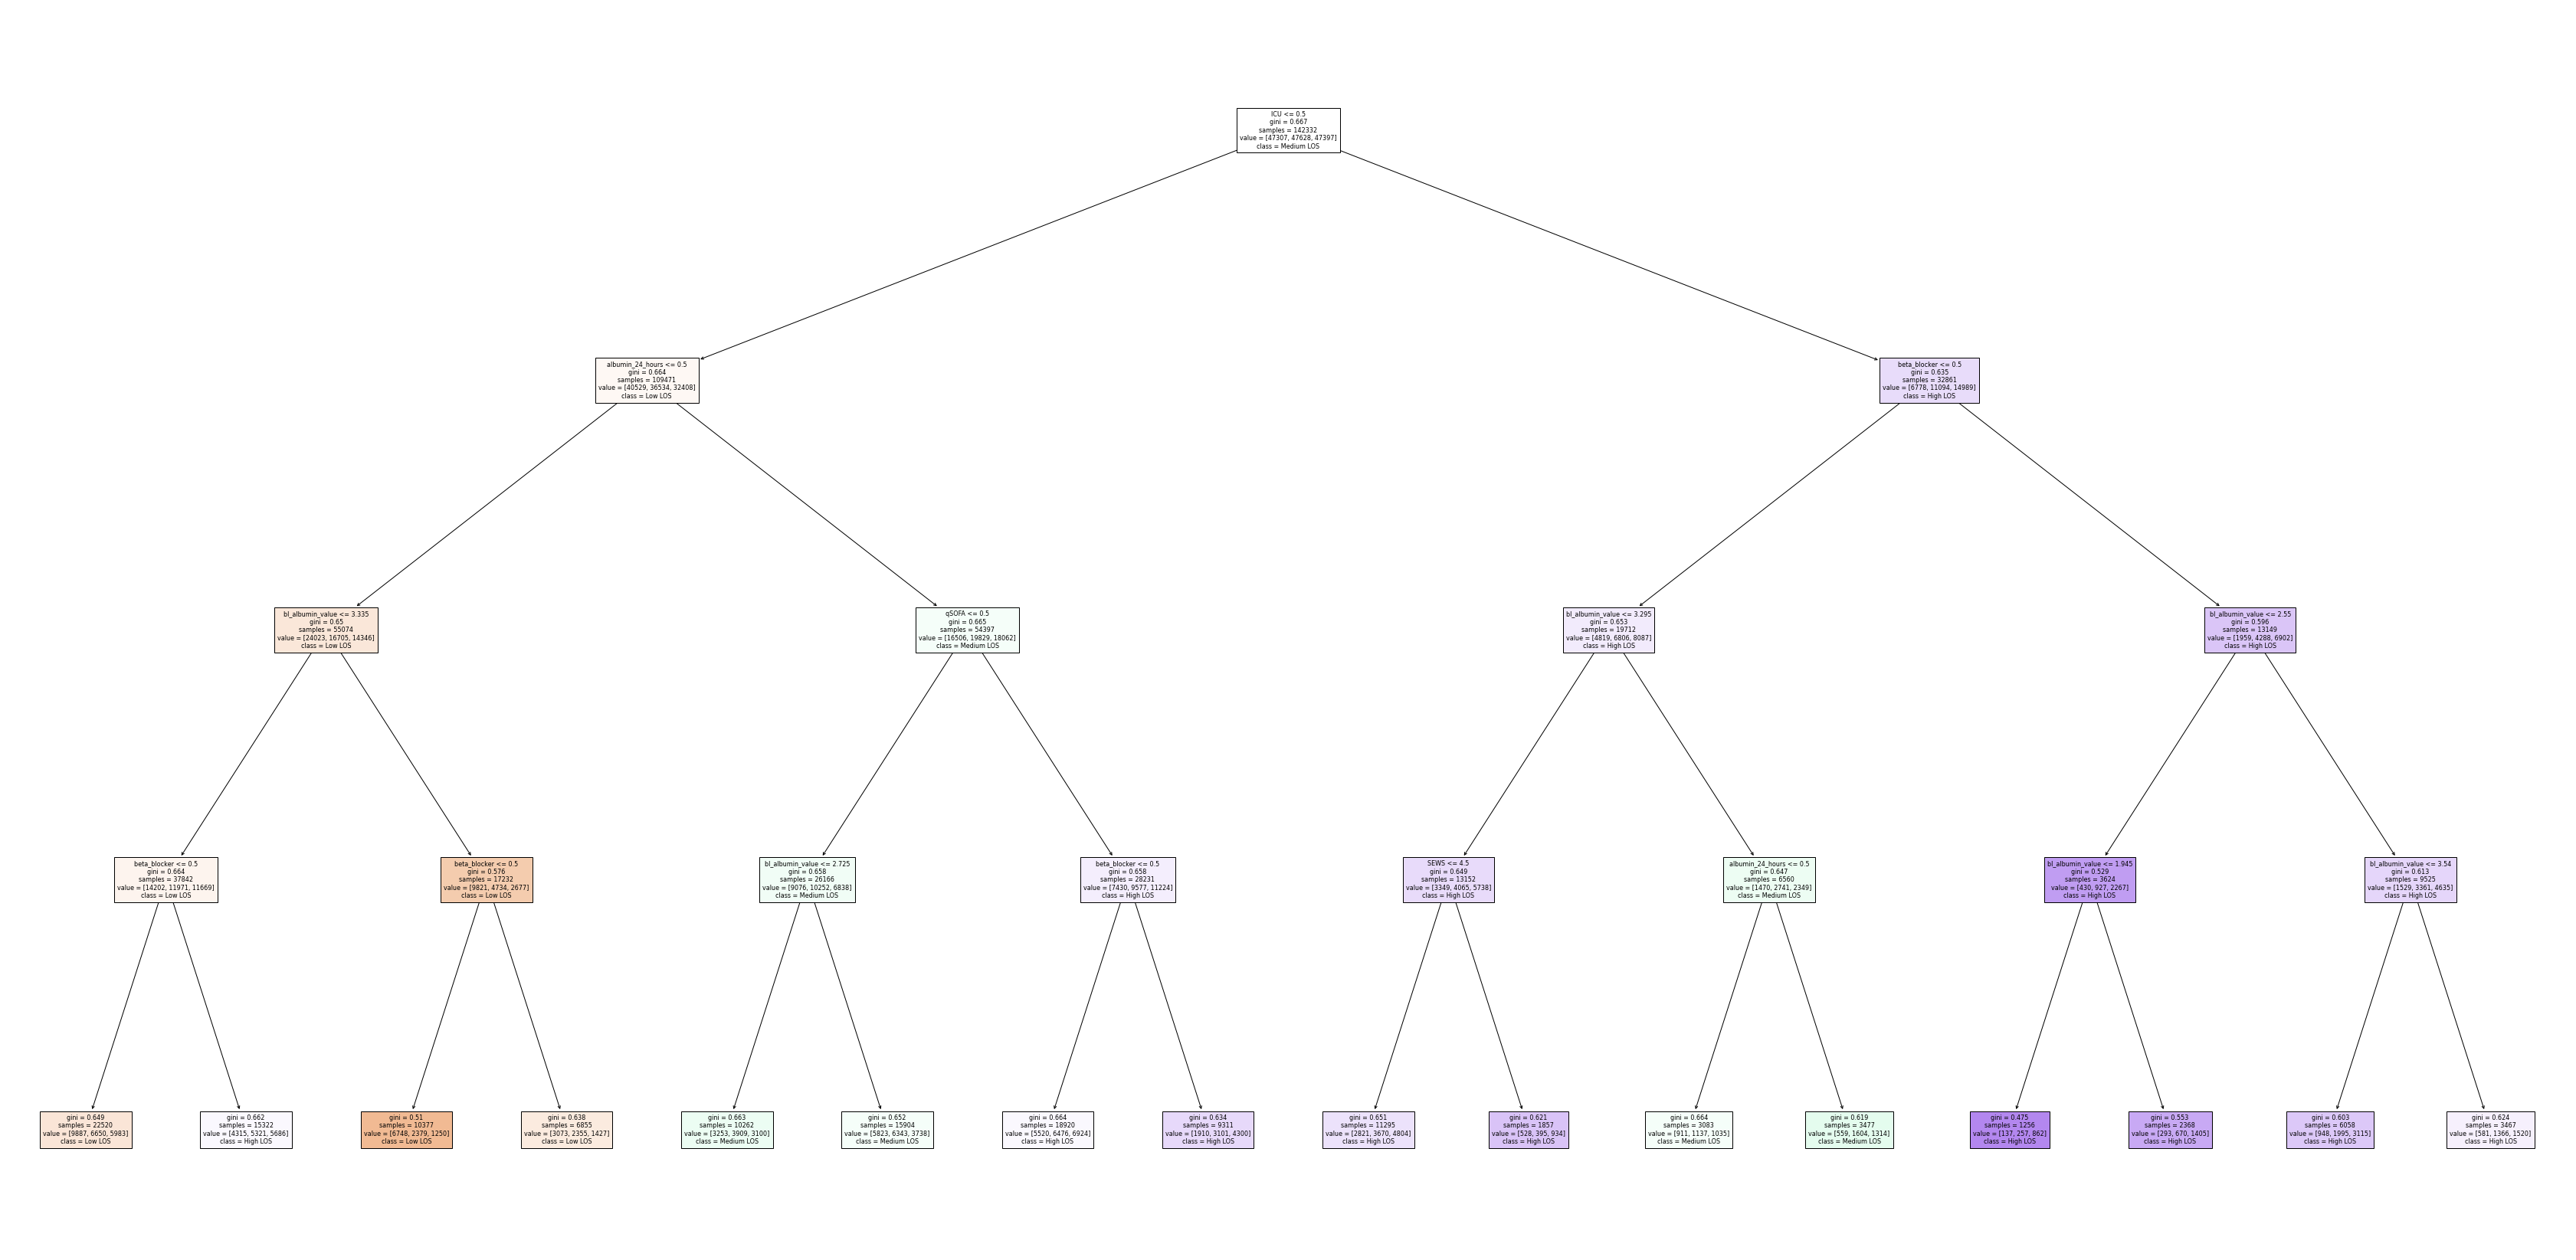

In [464]:
feature_names = X_train.columns.tolist()
class_names = ['Low LOS', 'Medium LOS', 'High LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [383]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D4_MATCHED_178K.png')

True

## 3: Decision Tree 

In [465]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)

Feature: ICU Score: 0.25045
Feature: CCI Score: 0.01001
Feature: bl_albumin_value Score: 0.23016
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.08766
Feature: beta_blocker Score: 0.16775
Feature: Cirrhosis_score Score: 0.01406
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.08873
Feature: albumin_24_hours Score: 0.15118


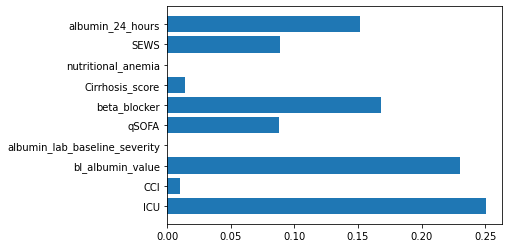

In [466]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [467]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [468]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[19950 15862 11495]
 [11597 19517 16514]
 [ 8818 14568 24011]]


In [469]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.49      0.42      0.46     47307
           1       0.39      0.41      0.40     47628
           2       0.46      0.51      0.48     47397

    accuracy                           0.45    142332
   macro avg       0.45      0.45      0.45    142332
weighted avg       0.45      0.45      0.45    142332



In [470]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4997 4083 2872]
 [2853 4844 3990]
 [2199 3640 6106]]


In [471]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.50      0.42      0.45     11952
           1       0.39      0.41      0.40     11687
           2       0.47      0.51      0.49     11945

    accuracy                           0.45     35584
   macro avg       0.45      0.45      0.45     35584
weighted avg       0.45      0.45      0.45     35584



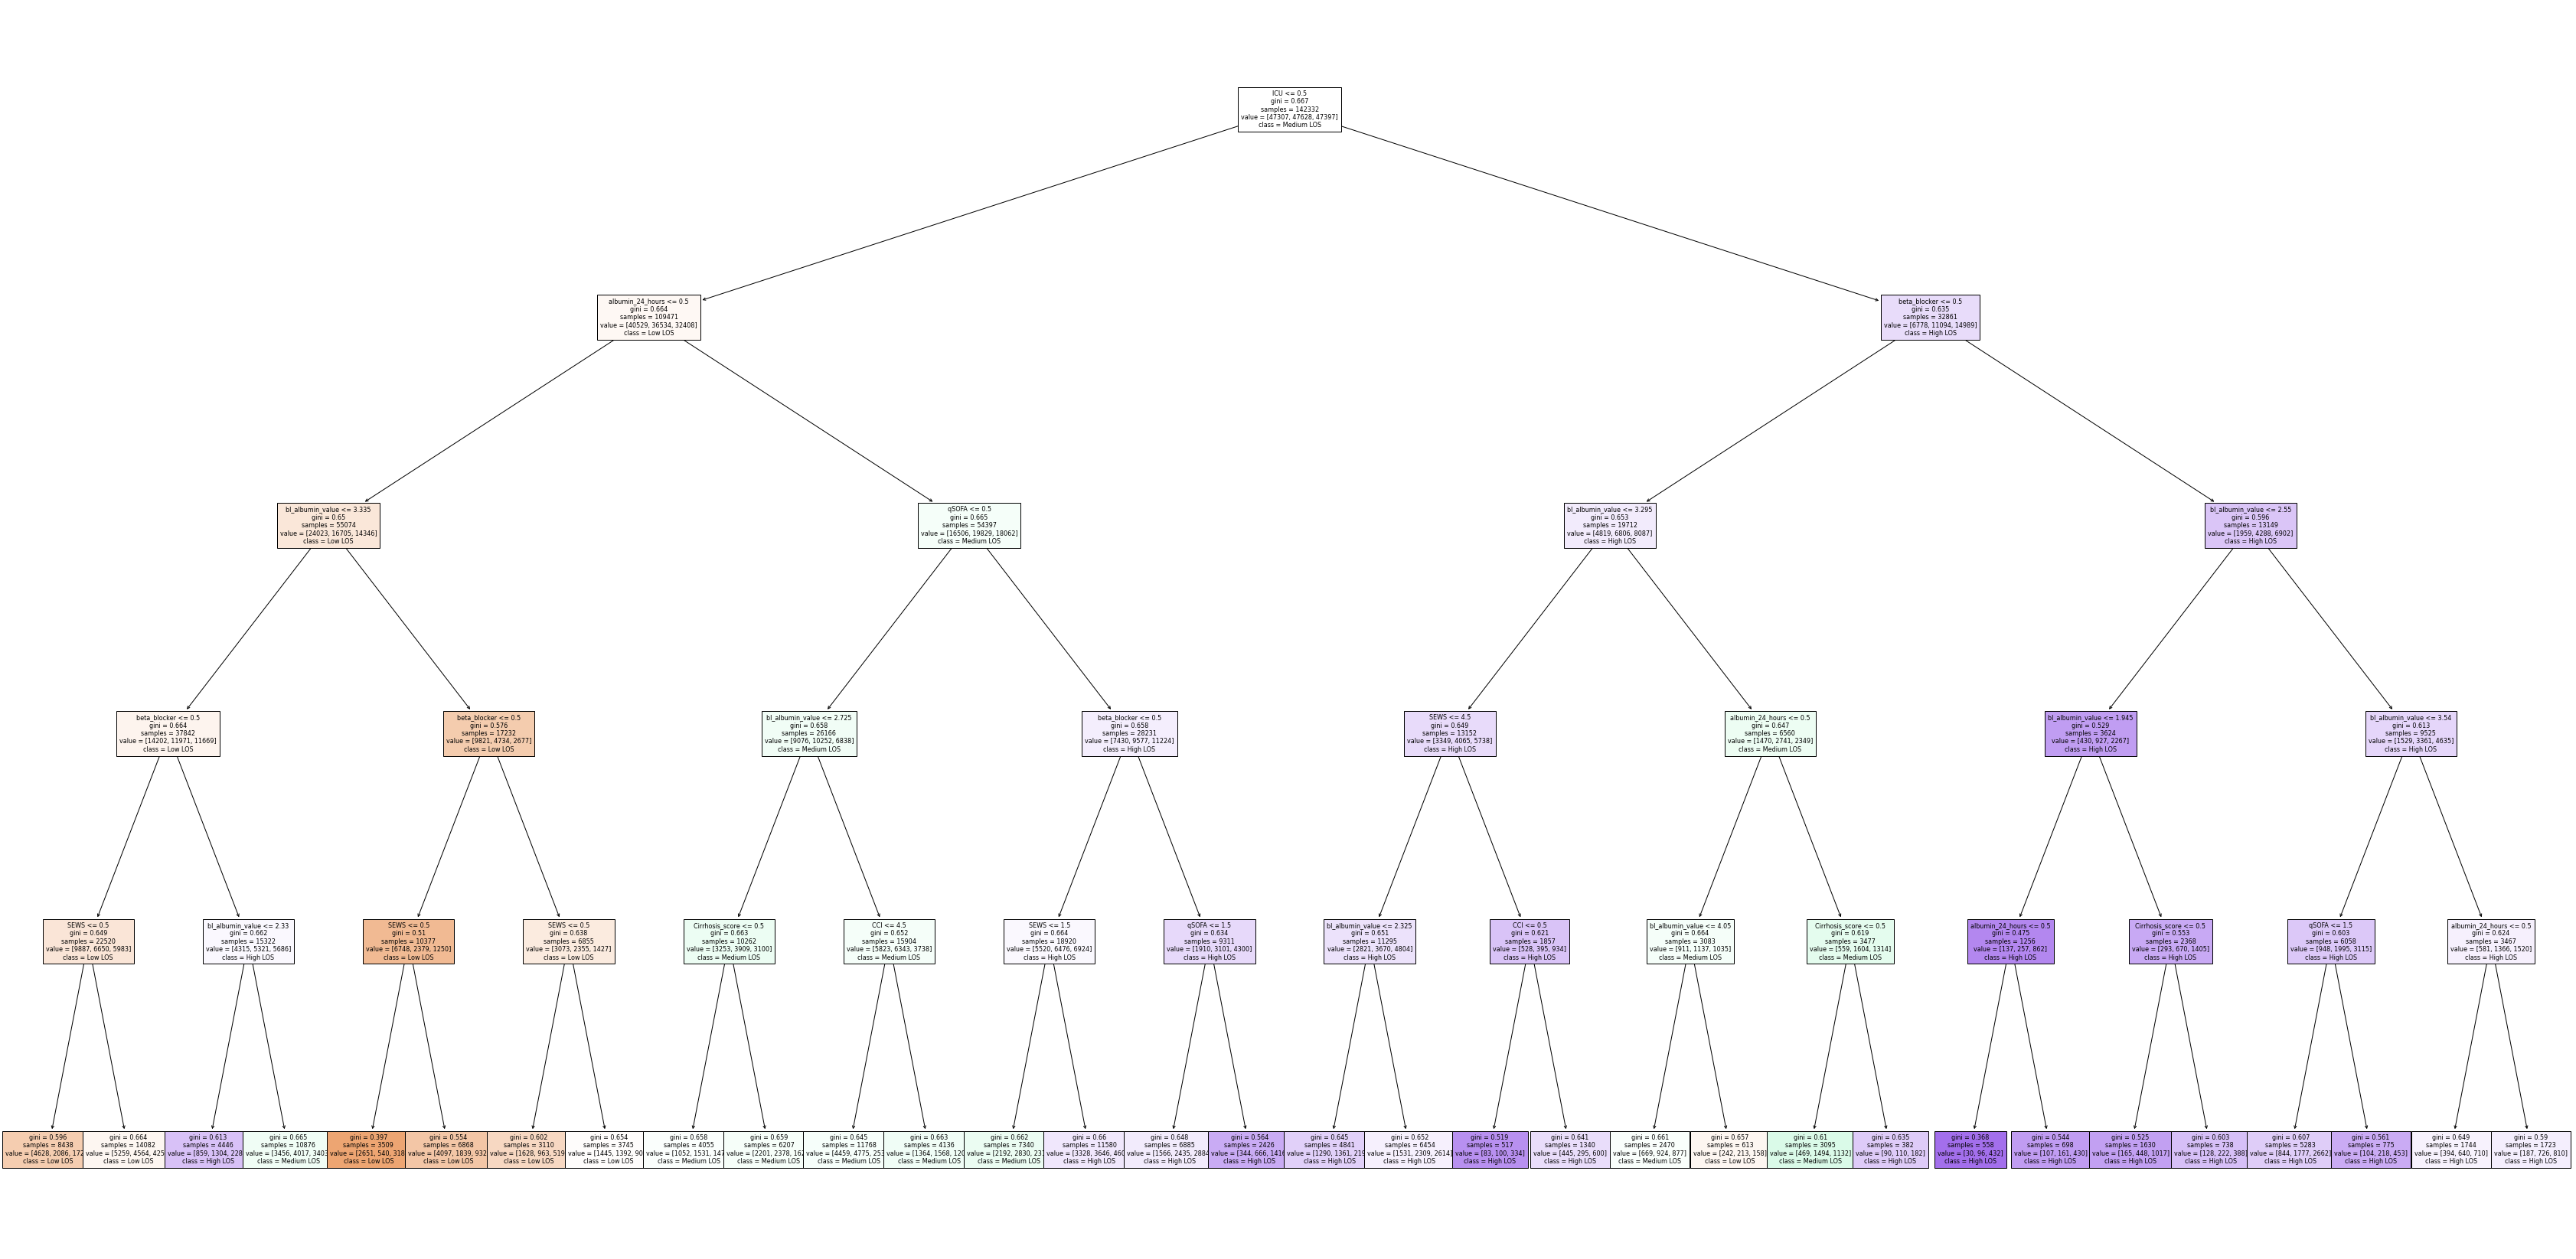

In [472]:
feature_names = X_train.columns.tolist()
class_names = ['Low LOS', 'Medium LOS', 'High LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [392]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D5_MATCHED_178K.png')

True

## 4: Decision Tree 

In [473]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)

Feature: ICU Score: 0.22412
Feature: CCI Score: 0.01158
Feature: bl_albumin_value Score: 0.26591
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.09327
Feature: beta_blocker Score: 0.15320
Feature: Cirrhosis_score Score: 0.02272
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.08734
Feature: albumin_24_hours Score: 0.14186


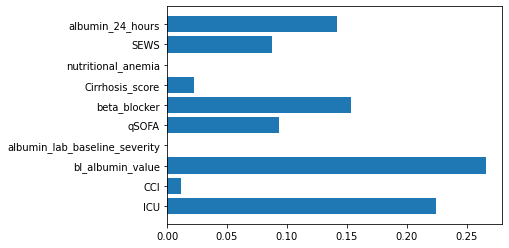

In [474]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [475]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [476]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[19530 13422 14355]
 [11007 16586 20035]
 [ 7426 11780 28191]]


In [477]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.51      0.41      0.46     47307
           1       0.40      0.35      0.37     47628
           2       0.45      0.59      0.51     47397

    accuracy                           0.45    142332
   macro avg       0.45      0.45      0.45    142332
weighted avg       0.45      0.45      0.45    142332



In [478]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4907 3466 3579]
 [2690 4127 4870]
 [1887 2957 7101]]


In [479]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.52      0.41      0.46     11952
           1       0.39      0.35      0.37     11687
           2       0.46      0.59      0.52     11945

    accuracy                           0.45     35584
   macro avg       0.46      0.45      0.45     35584
weighted avg       0.46      0.45      0.45     35584



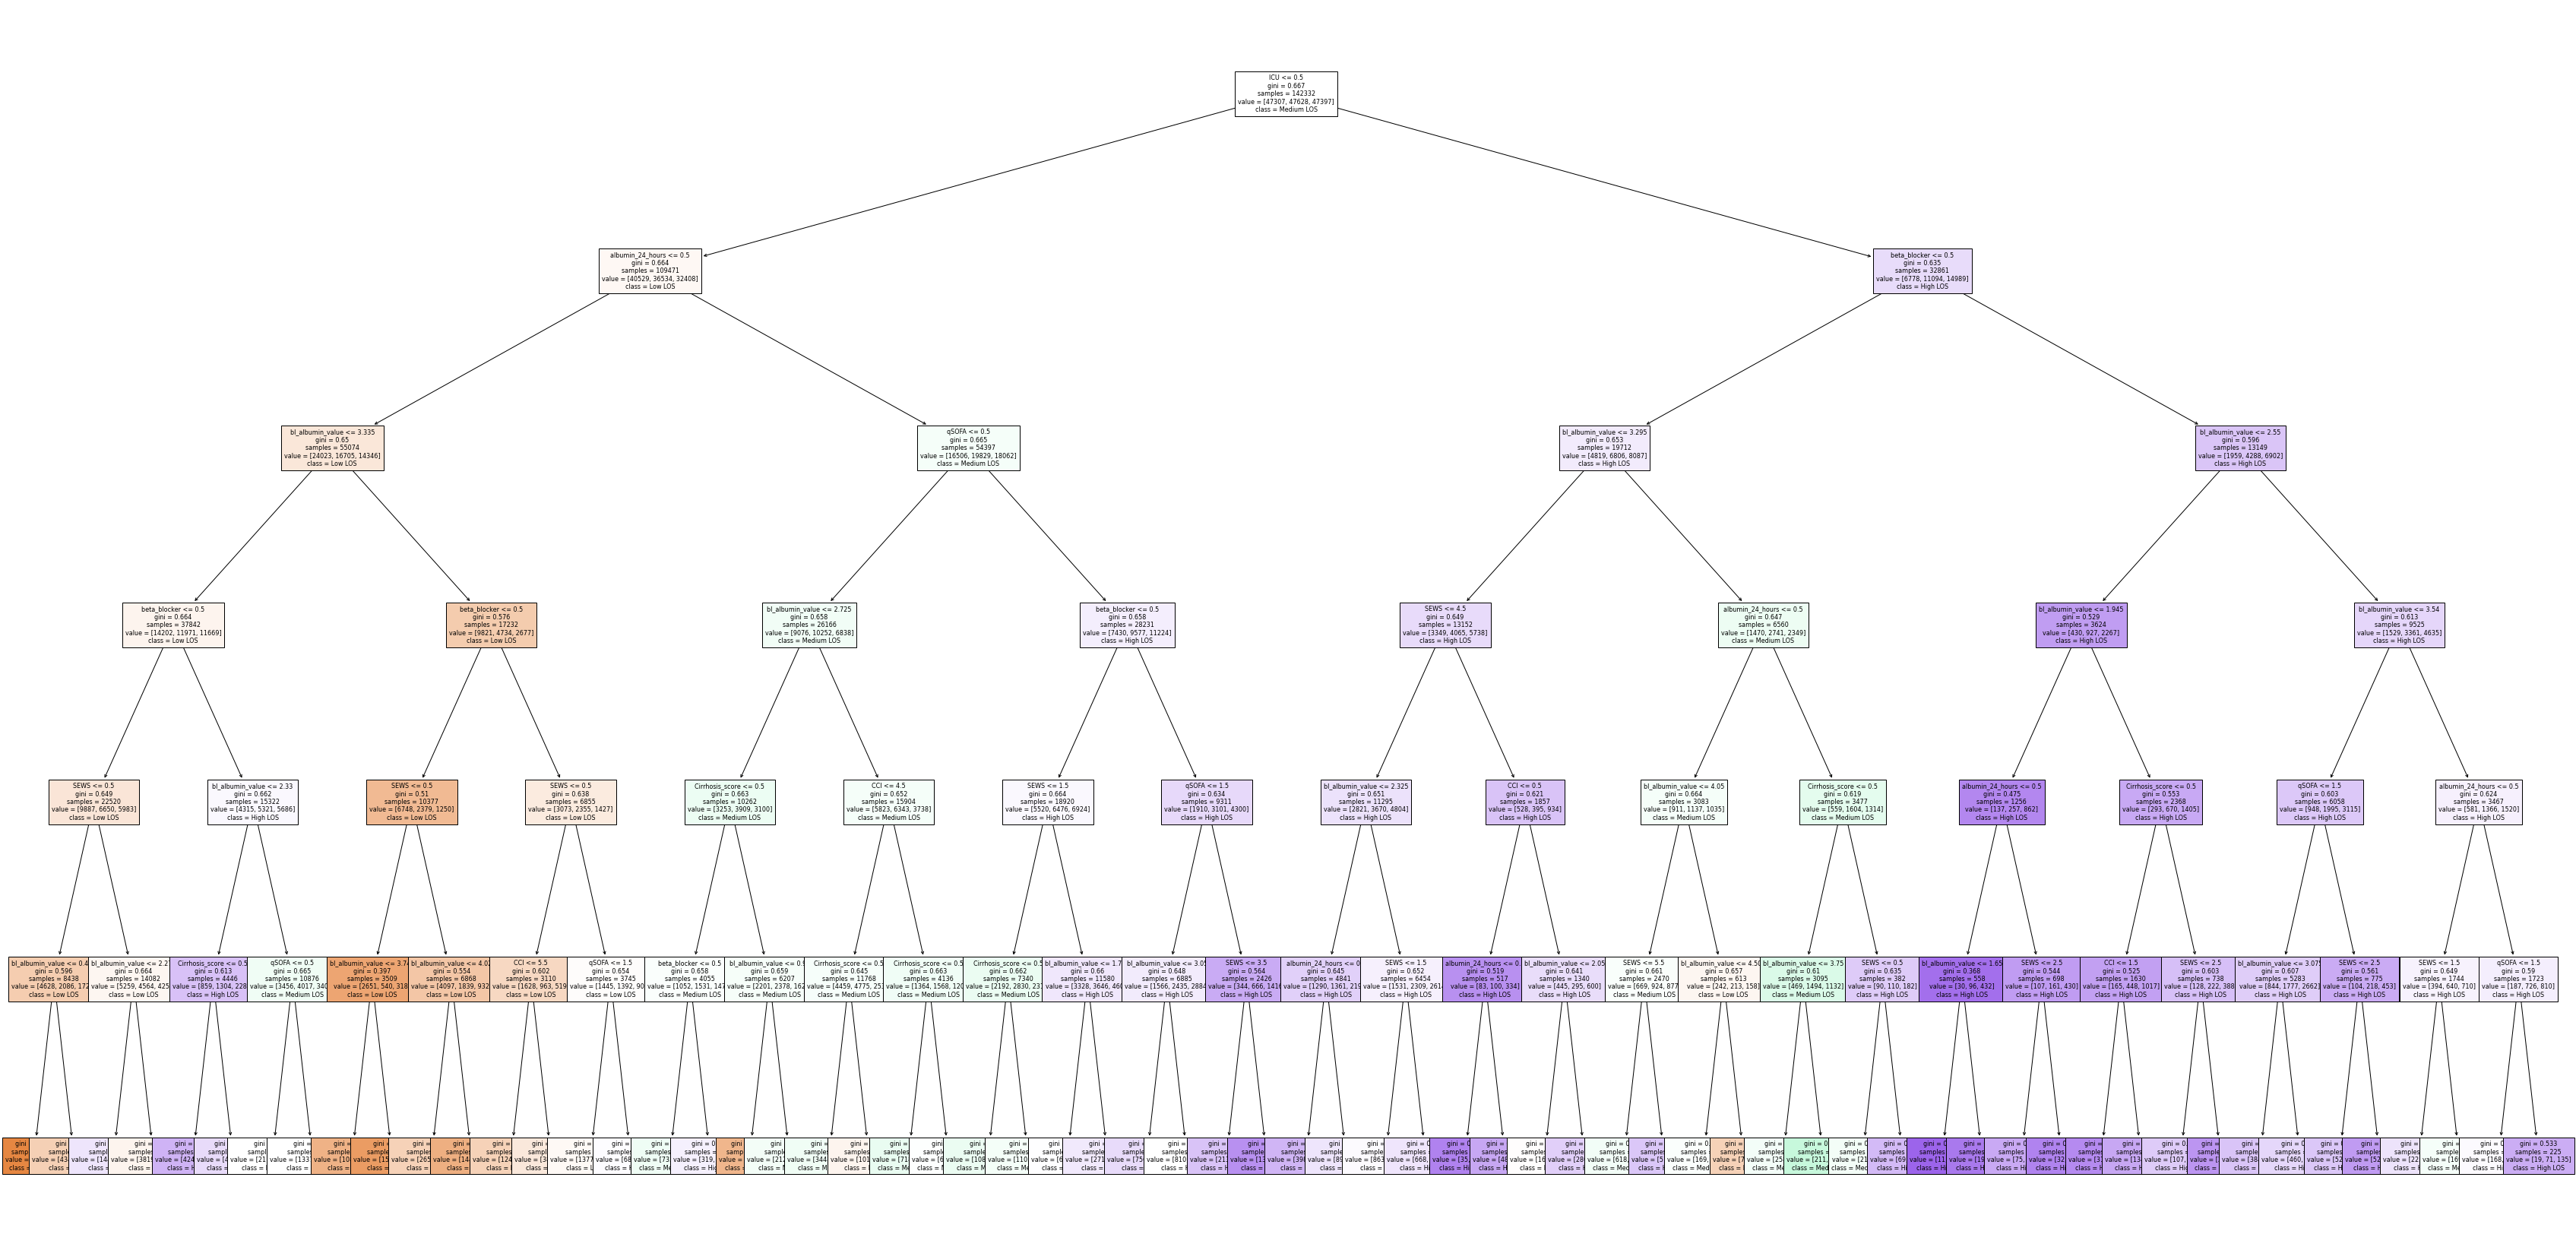

In [480]:
feature_names = X_train.columns.tolist()
class_names = ['Low LOS', 'Medium LOS', 'High LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [401]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D6_MATCHED_178K.png')

True

## 5: Decision Tree 

In [481]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

Feature: ICU Score: 0.20847
Feature: CCI Score: 0.02171
Feature: bl_albumin_value Score: 0.27490
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.09985
Feature: beta_blocker Score: 0.14318
Feature: Cirrhosis_score Score: 0.02992
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.08886
Feature: albumin_24_hours Score: 0.13311


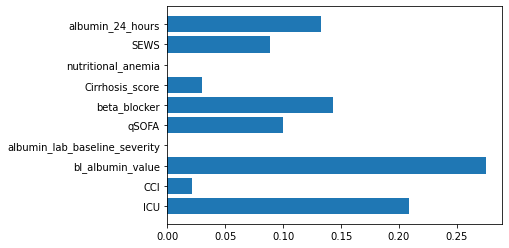

In [482]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [483]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [484]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[20679 14410 12218]
 [11770 19222 16636]
 [ 7794 14513 25090]]


In [485]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.51      0.44      0.47     47307
           1       0.40      0.40      0.40     47628
           2       0.47      0.53      0.50     47397

    accuracy                           0.46    142332
   macro avg       0.46      0.46      0.46    142332
weighted avg       0.46      0.46      0.46    142332



In [486]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[5189 3716 3047]
 [2931 4730 4026]
 [1998 3674 6273]]


In [487]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.51      0.43      0.47     11952
           1       0.39      0.40      0.40     11687
           2       0.47      0.53      0.50     11945

    accuracy                           0.46     35584
   macro avg       0.46      0.45      0.45     35584
weighted avg       0.46      0.46      0.45     35584



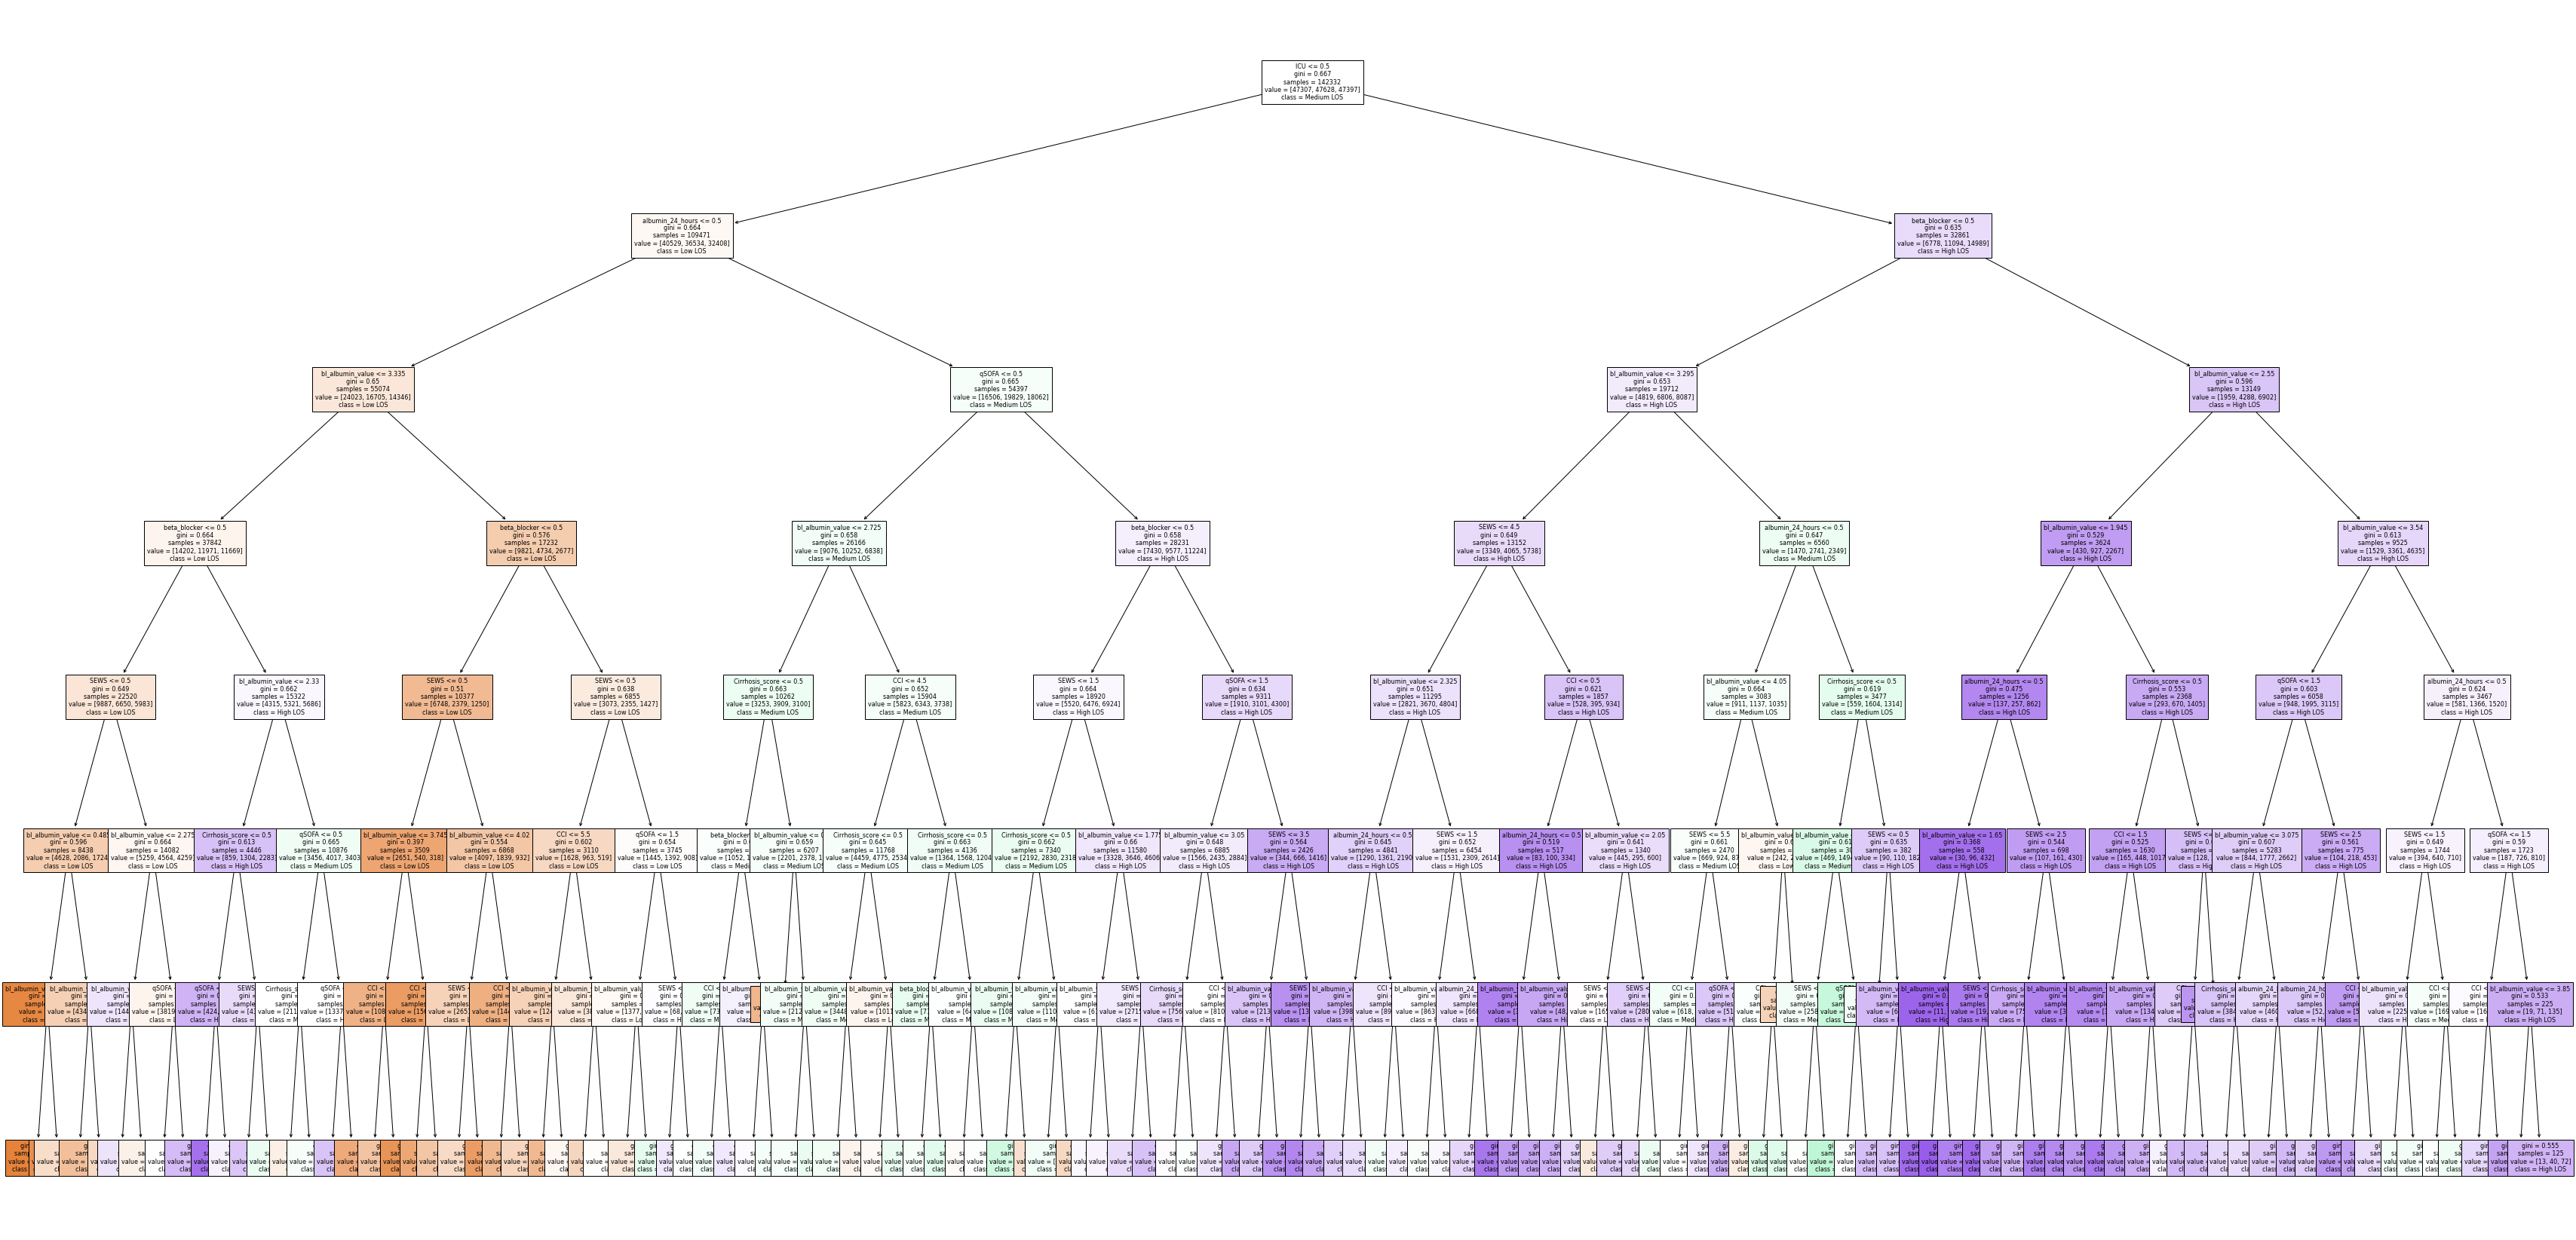

In [488]:
feature_names = X_train.columns.tolist()
class_names = ['Low LOS', 'Medium LOS', 'High LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [489]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D7_MATCHED_178K_v2.png')

True

## Random Forest

In [53]:
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100)

In [54]:
# generate model prediction data for train and test sets
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [55]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[ 42478   6691  29106]
 [ 27499   9425  54026]
 [ 19704   6073 109965]]


In [56]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.47      0.54      0.51     78275
           1       0.42      0.10      0.17     90950
           2       0.57      0.81      0.67    135742

    accuracy                           0.53    304967
   macro avg       0.49      0.49      0.45    304967
weighted avg       0.50      0.53      0.48    304967



In [57]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[10737  1690  7277]
 [ 6864  2400 13411]
 [ 4863  1550 27450]]


In [58]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.48      0.54      0.51     19704
           1       0.43      0.11      0.17     22675
           2       0.57      0.81      0.67     33863

    accuracy                           0.53     76242
   macro avg       0.49      0.49      0.45     76242
weighted avg       0.50      0.53      0.48     76242



Feature: albumin_24hrs Score: 0.68268
Feature: ICU Score: 0.09195
Feature: CCI Score: 0.04476
Feature: qSOFA Score: 0.05184
Feature: beta_blocker Score: 0.05392
Feature: Cirrhosis_score Score: 0.02860
Feature: nutritional_anemia Score: 0.00242
Feature: SEWS Score: 0.04383


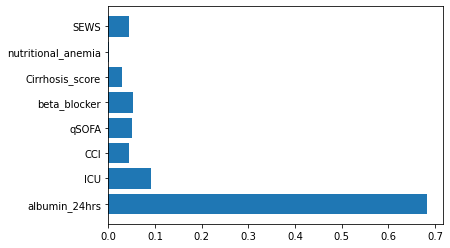

In [59]:
# get importance from decision tree model
importance = rf.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()